In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from textblob import TextBlob
from textblob import Word

In [2]:
#Read the data file
rev = pd.read_csv("C:/Users/USER/Desktop/Course_Data_Scientist_Springboard/1Project_E-commerce/Womens Clothing E-Commerce Reviews.csv", index_col=0)

### Basic Feature Extraction for Review Text.

First, I clean the data removing the NaN values and save as 'rev_new'.

In [3]:
#Filter out data removing the NaN values
rev_new = rev[rev['Review Text'].notnull()]

Here, we calculate the number of characters in each review text.

In [4]:
#Find the length of characters of review text. This also includes spaces
rev_new['char_length_RT'] = rev_new['Review Text'].map(str).apply(len)
print (rev_new.head())

   Clothing ID  Age                    Title  \
0          767   33                      NaN   
1         1080   34                      NaN   
2         1077   60  Some major design flaws   
3         1049   50         My favorite buy!   
4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1                        4         General         Dresses    Dresses   
2    

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [5]:
rev_new.tail(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,char_length_RT
23475,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,153
23476,522,27,Cheeky!,These bottoms are very cute but defiantly chee...,4,1,0,Initmates,Intimate,Swim,112
23477,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,500
23478,1104,32,Unflattering,I was surprised at the positive reviews for th...,1,0,0,General Petite,Dresses,Dresses,229
23479,1005,42,What a fun piece!,So i wasn't sure about ordering this skirt bec...,5,1,0,General Petite,Bottoms,Skirts,500
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,131
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,223
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,208
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,427
23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses,110


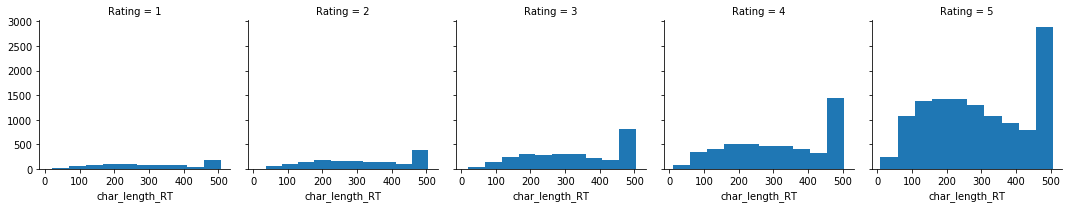

In [5]:
g = sns.FacetGrid(rev_new, col="Rating")
ax =g.map(plt.hist, 'char_length_RT')

#To save the figure
#ax.savefig('Figures/Char_length_RT.png')

#### From this analysis I can understand that the text has limit of 500 character length!


We extract the number of words. 

In [6]:
#Number of word of the Review Text
rev_new['word_count_RT'] = rev_new['Review Text'].apply(lambda x: len(str(x).split(" ")))
rev_new[['Review Text','word_count_RT']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,word_count_RT
0,Absolutely wonderful - silky and sexy and comf...,8
1,Love this dress! it's sooo pretty. i happene...,67
2,I had such high hopes for this dress and reall...,98
3,"I love, love, love this jumpsuit. it's fun, fl...",22
4,This shirt is very flattering to all due to th...,36


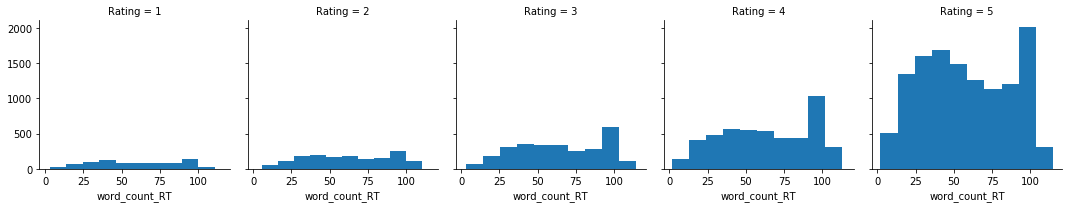

In [7]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "word_count_RT")

We will also extract another feature which will calculate the average word length of each review text.

Here, we simply take the sum of the length of all the words and divide it by the total length of the text.

In [8]:
#average word length
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

rev_new['avg_word'] = rev_new['Review Text'].apply(lambda x: avg_word(x))

# Replace all the missing values in the avg_word column with the mean
word_mean = rev_new.avg_word.mean()
rev_new['avg_word'] = rev_new.avg_word.fillna(word_mean)

rev_new[['Review Text','avg_word']].tail(10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,Review Text,avg_word
23475,Cute dress but not for me. the waist is too h...,4.033333
23476,These bottoms are very cute but defiantly chee...,4.650000
23477,I'm so impressed with the beautiful color comb...,4.767442
23478,I was surprised at the positive reviews for th...,4.227273
23479,So i wasn't sure about ordering this skirt bec...,4.164948
23481,I was very happy to snag this dress at such a ...,3.714286
23482,"It reminds me of maternity clothes. soft, stre...",4.894737
23483,"This fit well, but the top was very see throug...",3.976190
23484,I bought this dress for a wedding i have this ...,3.976744
23485,This dress in a lovely platinum is feminine an...,4.842105


In [10]:
rev_new[['char_length_RT', 'word_count_RT']].describe()

,char_length_RT,word_count_RT
count,22641.000000,22641.000000
mean,308.687911,60.214876
std,143.940048,28.503976
min,9.000000,2.000000
25%,186.000000,36.000000
50%,301.000000,59.000000
75%,459.000000,88.000000
max,508.000000,115.000000


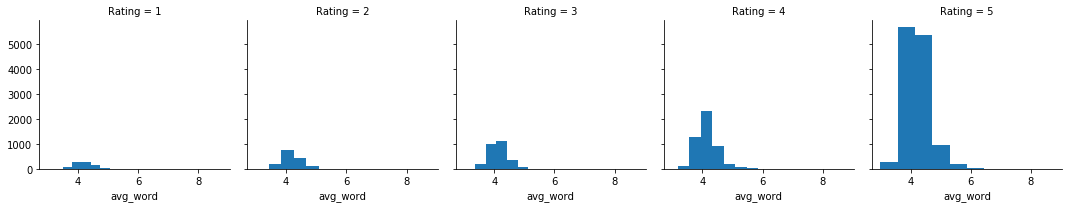

In [9]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "avg_word")

We calculate the number of **stopwords** that can give us some extra information.

In [10]:
stop = stopwords.words('english')
rev_new['stopwords_len'] = rev_new['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
rev_new[['Review Text','stopwords_len']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,stopwords_len
0,Absolutely wonderful - silky and sexy and comf...,2
1,Love this dress! it's sooo pretty. i happene...,30
2,I had such high hopes for this dress and reall...,45
3,"I love, love, love this jumpsuit. it's fun, fl...",6
4,This shirt is very flattering to all due to th...,19


In [11]:
# Number of special characters '!'
rev_new['spec_char'] = rev_new['Review Text'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
rev_new[['Review Text','spec_char']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,spec_char
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",2
4,This shirt is very flattering to all due to th...,1


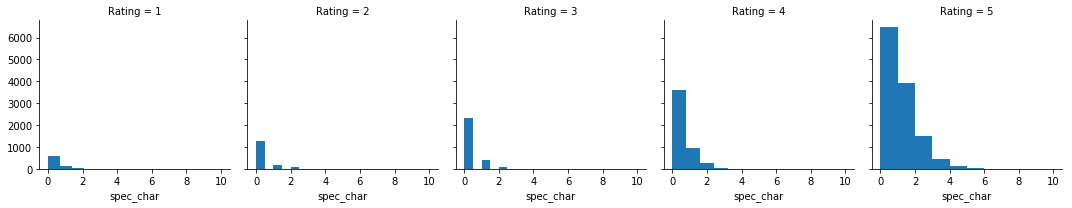

In [12]:
g = sns.FacetGrid(rev_new, col="Rating")
g.map(plt.hist, "spec_char")

As expected, we found more exclamation points ('!') for high Rating (4 and 5) than for low ones.

### Some Basic Feature Extraction for Title.

In [13]:
#Filter out data removing the NaN values
rev_new_T = rev[rev['Title'].notnull()]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


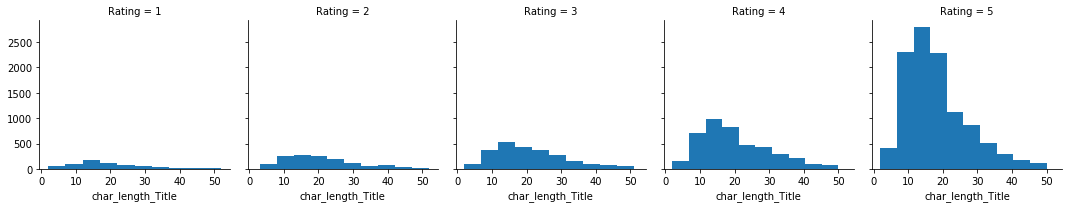

In [14]:
rev_new_T['char_length_Title'] = rev_new_T['Title'].map(str).apply(len)


g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "char_length_Title")

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                                           Title  char_length_Title  \
2                        Some major design flaws                 23   
3                               My favorite buy!                 16   
4                               Flattering shirt                 16   
5                        Not for the very petite                 23   
6                           Cagrcoal shimmer fun                 20   
7           Shimmer, surprisingly goes with lots                 36   
8                                     Flattering                 10   
9                              Such a fun dress!                 17   
10  Dress looks like it's made of cheap material                 44   
12                                    Perfect!!!                 10   

    word_count_Title  
2                  4  
3                  3  
4                  2  
5                  5  
6                  3  
7                  5  
8                  1  
9                  4  
10         

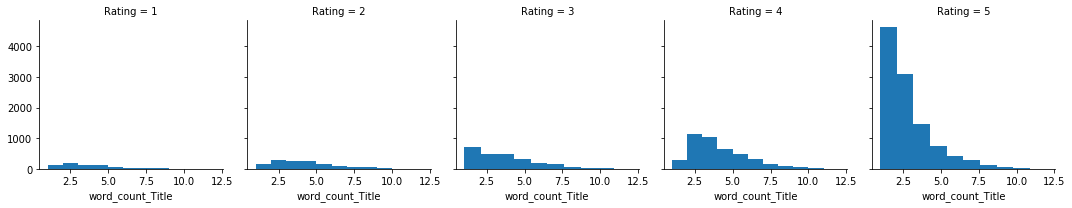

In [15]:
#Number of word of the Title
rev_new_T['word_count_Title'] = rev_new_T['Title'].apply(lambda x: len(str(x).split(" ")))
print (rev_new_T[['Title','char_length_Title', 'word_count_Title']].head(10))

g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "word_count_Title")

In [22]:
rev_new_T[['char_length_Title', 'word_count_Title']].describe()

,char_length_Title,word_count_Title
count,19676.000000,19676.000000
mean,19.096768,3.345497
std,9.579297,1.797094
min,2.000000,1.000000
25%,12.000000,2.000000
50%,17.000000,3.000000
75%,24.000000,4.000000
max,52.000000,12.000000


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                     Title  spec_char_Title
2  Some major design flaws                0
3         My favorite buy!                1
4         Flattering shirt                0
5  Not for the very petite                0
6     Cagrcoal shimmer fun                0


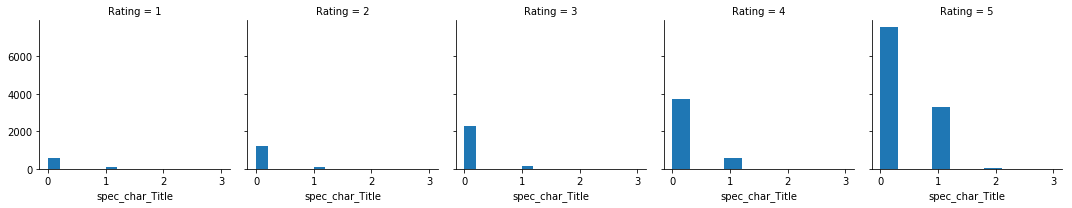

In [16]:
# Number of special characters '!'
rev_new_T['spec_char_Title'] = rev_new_T['Title'].apply(lambda x: len([x for x in x.split() if x.endswith('!')]))
print (rev_new_T[['Title','spec_char_Title']].head())

g = sns.FacetGrid(rev_new_T, col="Rating")
g.map(plt.hist, "spec_char_Title")

### Basic Pre-processing for Text Review

In [17]:
# Remove of Stop Words
rev_new['RT_new'] = rev_new['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

rev_new[['Review Text','RT_new']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,RT_new
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful - silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,"Love dress! sooo pretty. happened find store, ..."
2,I had such high hopes for this dress and reall...,I high hopes dress really wanted work me. init...
3,"I love, love, love this jumpsuit. it's fun, fl...","I love, love, love jumpsuit. fun, flirty, fabu..."
4,This shirt is very flattering to all due to th...,This shirt flattering due adjustable front tie...


In [18]:
#Removing Punctuation
rev_new['RT_new'] = rev_new['RT_new'].str.replace('[^\w\s]','')
rev_new['RT_new'].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0         Absolutely wonderful  silky sexy comfortable
1    Love dress sooo pretty happened find store im ...
2    I high hopes dress really wanted work me initi...
3    I love love love jumpsuit fun flirty fabulous ...
4    This shirt flattering due adjustable front tie...
Name: RT_new, dtype: object

In [19]:
# Retain alphabetic words: alpha_only
rev_new['RT_new'] = rev_new['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))

rev_new[['Review Text','RT_new']].head()

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Review Text,RT_new
0,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,Love this sooo i happened to find it in a and ...
2,I had such high hopes for this dress and reall...,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",I love this and every time i wear i get nothin...
4,This shirt is very flattering to all due to th...,This shirt is very flattering to all due to th...


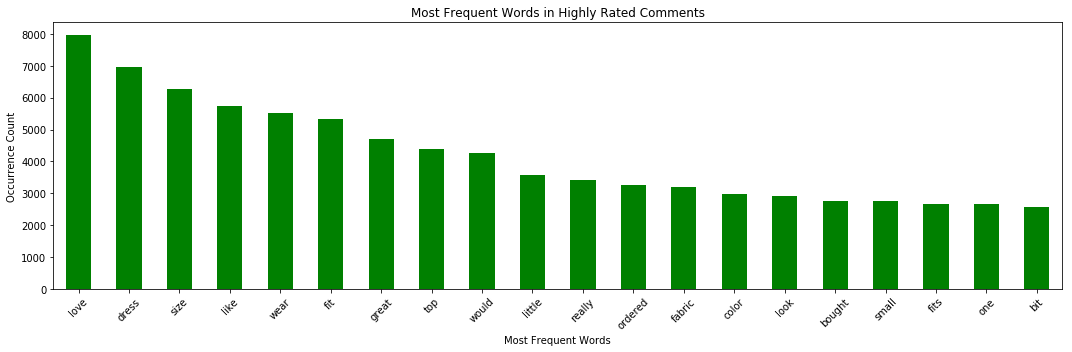

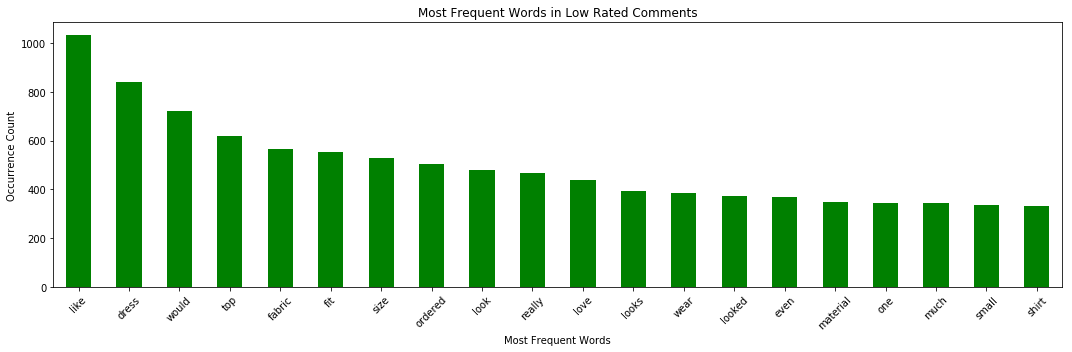

In [20]:
#Study of Most Frequent Words in Highly and Low Rated Comments

#ps = PorterStemmer()

#Tokenization refers to dividing the text into a sequence of words or sentences.

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words


title ='Most Frequent Words in Highly Rated Comments'
temp = rev_new['RT_new'][rev_new.Rating.astype(int) >= 3]

# Bar Chart
ax = wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_high.png')

#Low Raited
title ='Most Frequent Words in Low Rated Comments'
temp_low = rev_new['RT_new'][rev_new.Rating.astype(int) < 3]

# Bar Chart
ax = wordfreq(preprocessing(temp_low), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_low.png')


In [21]:
temp = rev_new['RT_new']

# The most common words used
freq_common = pd.Series(' '.join(preprocessing(temp)).split()).value_counts()[:10]
print ('The most common words used:')
print(freq_common)



The most common words used:
love      8401
dress     7807
size      6789
like      6755
wear      5900
fit       5883
top       5024
would     4978
great     4894
really    3881
dtype: int64


## Title

In [8]:
rev_new_T.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
10,1077,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
12,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses


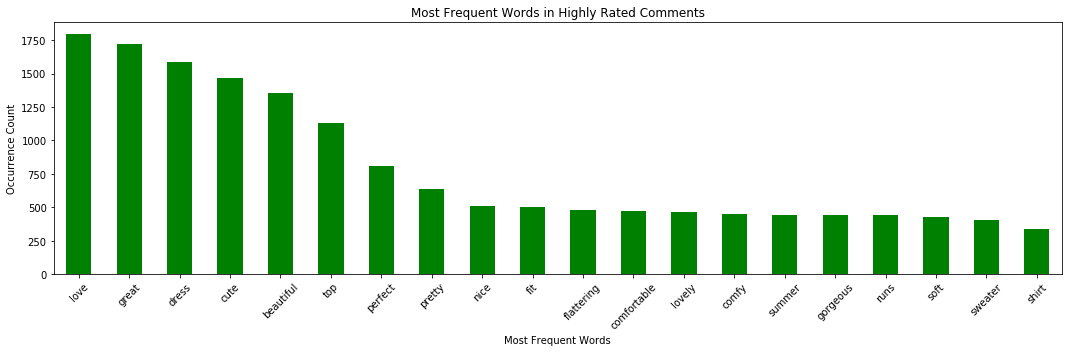

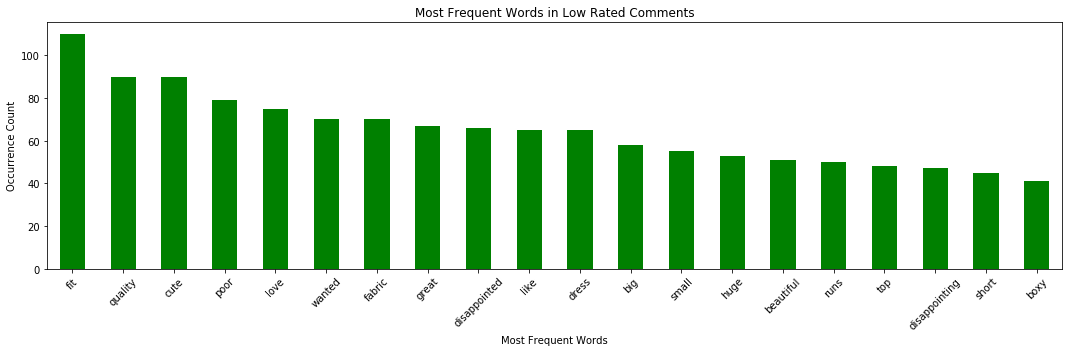

In [22]:
#Study of Most Frequent Words in Highly and Low Rated Comments

#ps = PorterStemmer()

#Tokenization refers to dividing the text into a sequence of words or sentences.

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rlst = pd.DataFrame(word_dist.most_common(top_N),
                        columns=['Word', 'Frequency']).set_index('Word')
    return rlst

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words


title ='Most Frequent Words in Highly Rated Comments'
temp = rev_new_T['Title'][rev_new_T.Rating.astype(int) >= 3]

# Bar Chart
ax = wordfreq(preprocessing(temp), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_high.png')

#Low Raited
title ='Most Frequent Words in Low Rated Comments'
temp_low = rev_new_T['Title'][rev_new_T.Rating.astype(int) < 3]

# Bar Chart
ax = wordfreq(preprocessing(temp_low), 20).plot.bar(rot=45, legend=False, figsize=(15, 5), color='g',
                                          title=title)
plt.ylabel('Occurrence Count')
plt.xlabel('Most Frequent Words')
plt.tight_layout()
plt.show()

#Save figure
#fig = ax.get_figure()
#fig.savefig('Figures/Freq_Rat_low.png')


### Tf-Idf

### Text Review

In [23]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
text = rev_new['RT_new']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer(stop_words='english')

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit(text)


# summarize
#print(text_tfidf.vocabulary_)
#print(text_tfidf.idf_)

# encode document
vector = text_tfidf.transform(text) 

# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())


#Print the first 10 words based on tfidf score

indices = np.argsort(tfidf_vec.idf_)[::1]
features = tfidf_vec.get_feature_names()
top_features = [features[i] for i in indices[:10]]
print (top_features)


['love', 'like', 'size', 'fit', 'wear', 'dress', 'just', 'great', 'ordered', 'fabric']


### Title

In [24]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Take the title text
text = rev_new_T['Title']

# Create the vectorizer method
tfidf_vec = TfidfVectorizer(stop_words='english')

# Transform the text into tf-idf vectors
text_tfidf = tfidf_vec.fit(text)


# summarize
#print(text_tfidf.vocabulary_)
#print(text_tfidf.idf_)

# encode document
vector = text_tfidf.transform(text) 

# summarize encoded vector
#print(vector.shape)
#print(vector.toarray())


#Print the first 10 words based on tfidf score

indices = np.argsort(tfidf_vec.idf_)[::1]
features = tfidf_vec.get_feature_names()
top_features = [features[i] for i in indices[:10]]
print (top_features)


['great', 'love', 'dress', 'cute', 'beautiful', 'perfect', 'pretty', 'fit', 'nice', 'flattering']


## Sentiment analysis

We extracted the polarity: value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment.

# 1.

In [41]:
# Sentiment Analysis
#rev_new['RT_new'][:5].apply(lambda x: TextBlob(x).sentiment)

rev_new['sent'] = rev_new['Review Text'].apply(lambda x: pd.Series(TextBlob(x).sentiment.polarity))
rev_new[['Review Text','sent']].head(10)



C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Review Text,sent
0,Absolutely wonderful - silky and sexy and comf...,0.633333
1,Love this dress! it's sooo pretty. i happene...,0.339583
2,I had such high hopes for this dress and reall...,0.073675
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000
4,This shirt is very flattering to all due to th...,0.512891
5,"I love tracy reese dresses, but this one is no...",0.178750
6,I aded this in my basket at hte last mintue to...,0.133750
7,"I ordered this in carbon for store pick up, an...",0.171635
8,I love this dress. i usually get an xs but it ...,0.002500
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200


Recommended IND
0    0.129320
1    0.276479
Name: sent, dtype: float64

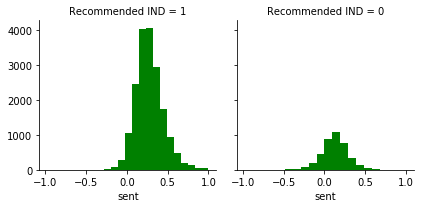

In [42]:
# Visualising polarity between recommending and non-recommending customers, then getting value counts
g = sns.FacetGrid(rev_new, col="Recommended IND", col_order=[1, 0])
g = g.map(plt.hist, "sent", bins=20, color="g")

recommend = rev_new.groupby(['Recommended IND'])
recommend['sent'].mean()

In [43]:
# Converting 0 to 1 Decimal Score to a Categorical Variable
rev_new['Sentiment'] = ''
rev_new.loc[rev_new['sent'] > 0, 'Sentiment'] = 'Positive'
rev_new.loc[rev_new['sent'] == 0, 'Sentiment'] = 'Neutral'
rev_new.loc[rev_new['sent'] < 0, 'Sentiment'] = 'Negative'

rev_new[['Review Text', 'sent', 'Sentiment', 'Recommended IND', 'Rating']].head(10)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Review Text,sent,Sentiment,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and comf...,0.633333,Positive,1,4
1,Love this dress! it's sooo pretty. i happene...,0.339583,Positive,1,5
2,I had such high hopes for this dress and reall...,0.073675,Positive,0,3
3,"I love, love, love this jumpsuit. it's fun, fl...",0.550000,Positive,1,5
4,This shirt is very flattering to all due to th...,0.512891,Positive,1,5
5,"I love tracy reese dresses, but this one is no...",0.178750,Positive,0,2
6,I aded this in my basket at hte last mintue to...,0.133750,Positive,1,5
7,"I ordered this in carbon for store pick up, an...",0.171635,Positive,1,4
8,I love this dress. i usually get an xs but it ...,0.002500,Positive,1,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",0.204200,Positive,1,5


In [127]:
pd.options.display.max_colwidth = 100

print(rev.iloc[5:10, 3:4])


                                                                                           Review Text
5  I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall...
6  I aded this in my basket at hte last mintue to see what it would look like in person. (store pic...
7  I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and use...
8  I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size....
9  I'm 5"5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typicall...


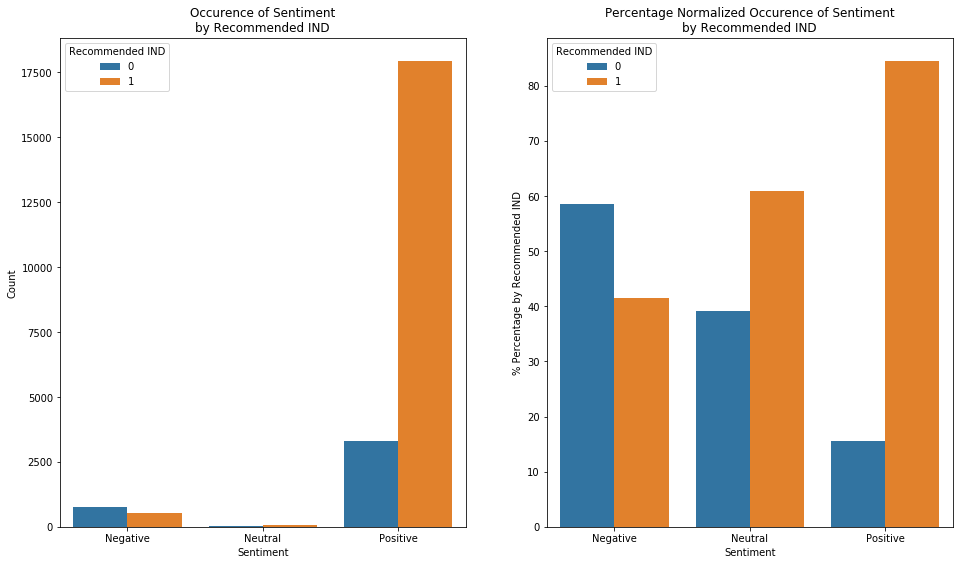

In [44]:
x, hue = "Sentiment", "Recommended IND"


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()


# 2.

In [25]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# next, we initialize VADER so we can use it within our Python script
sia = SentimentIntensityAnalyzer()

rev_new['Review Text']= rev_new['Review Text'].astype(str)


C:\Users\USER\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [26]:
# Applying Model, Variable Creation
rev_new['Polarity Score'] = rev_new['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
rev_new['Neutral Score'] = rev_new['Review Text'].apply(lambda x: sia.polarity_scores(x)['neu'])
rev_new['Negative Score'] = rev_new['Review Text'].apply(lambda x: sia.polarity_scores(x)['neg'])
rev_new['Positive Score'] = rev_new['Review Text'].apply(lambda x: sia.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
rev_new['Sentiment'] = ''
rev_new.loc[rev_new['Polarity Score'] > 0, 'Sentiment'] = 'Positive'
rev_new.loc[rev_new['Polarity Score'] == 0, 'Sentiment'] = 'Neutral'
rev_new.loc[rev_new['Polarity Score'] < 0, 'Sentiment'] = 'Negative'

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [76]:
rev_new[['Review Text', 'Sentiment', 'Recommended IND', 'Rating']].head(10)

,Review Text,Sentiment,Recommended IND,Rating
0,Absolutely wonderful - silky and sexy and comfortable,Positive,1,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i n...",Positive,1,5
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered th...,Positive,0,3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get no...",Positive,1,5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length t...,Positive,1,5
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall...",Positive,0,2
6,I aded this in my basket at hte last mintue to see what it would look like in person. (store pic...,Positive,1,5
7,"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and use...",Negative,1,4
8,I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size....,Positive,1,5
9,"I'm 5""5' and 125 lbs. i ordered the s petite to make sure the length wasn't too long. i typicall...",Negative,1,5


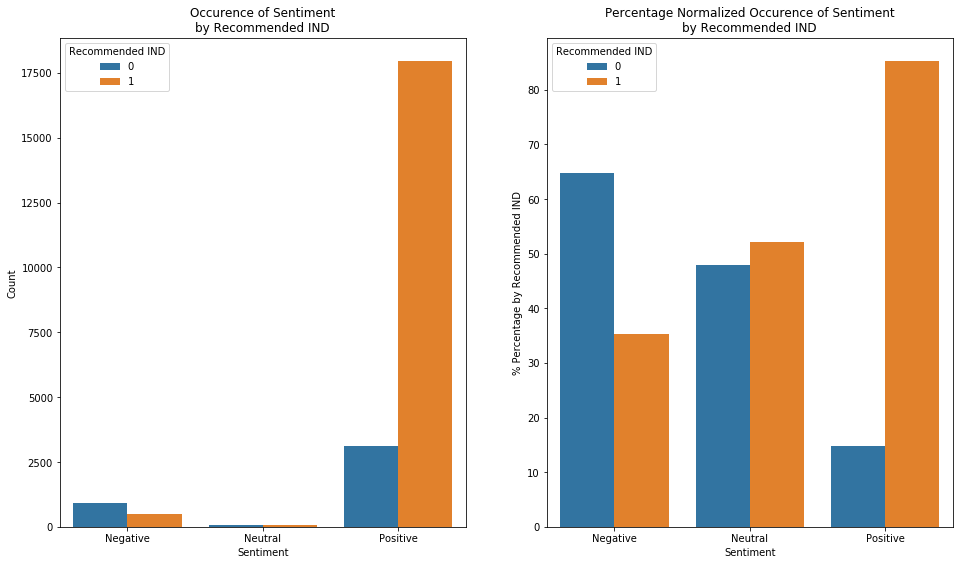

In [28]:
x, hue = "Sentiment", "Recommended IND"

f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))


sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()

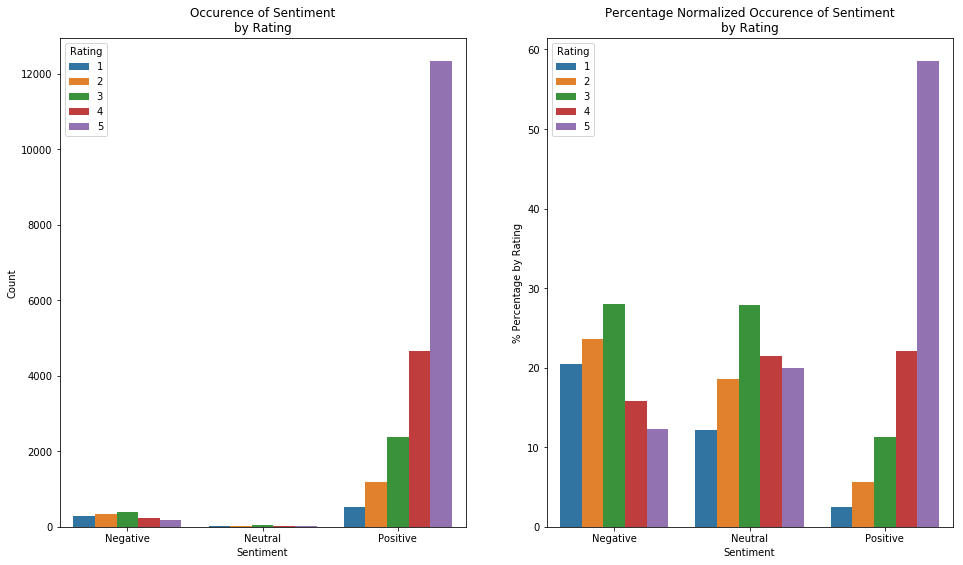

In [29]:
x, hue = "Sentiment", "Rating"

f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()

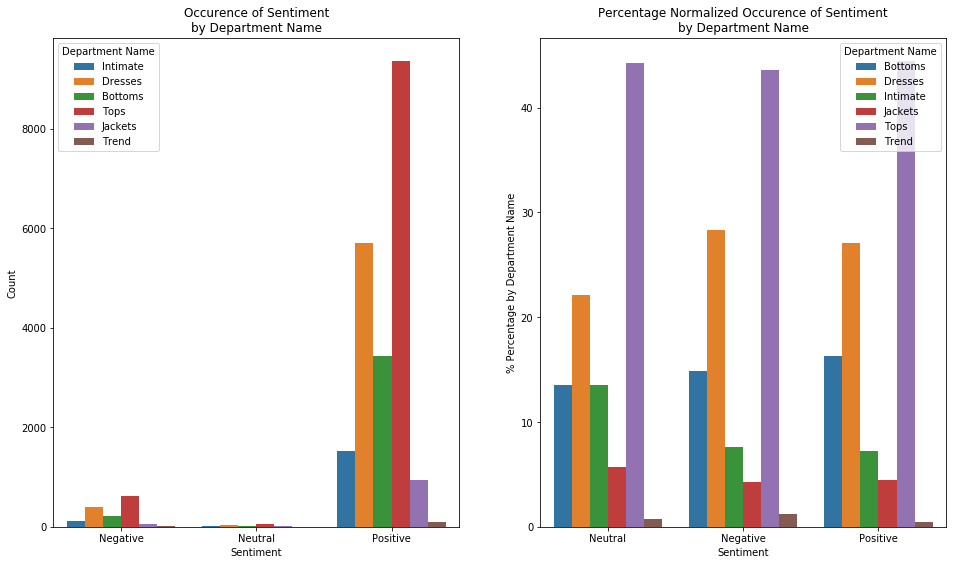

In [30]:
x, hue = "Sentiment", "Department Name"


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()


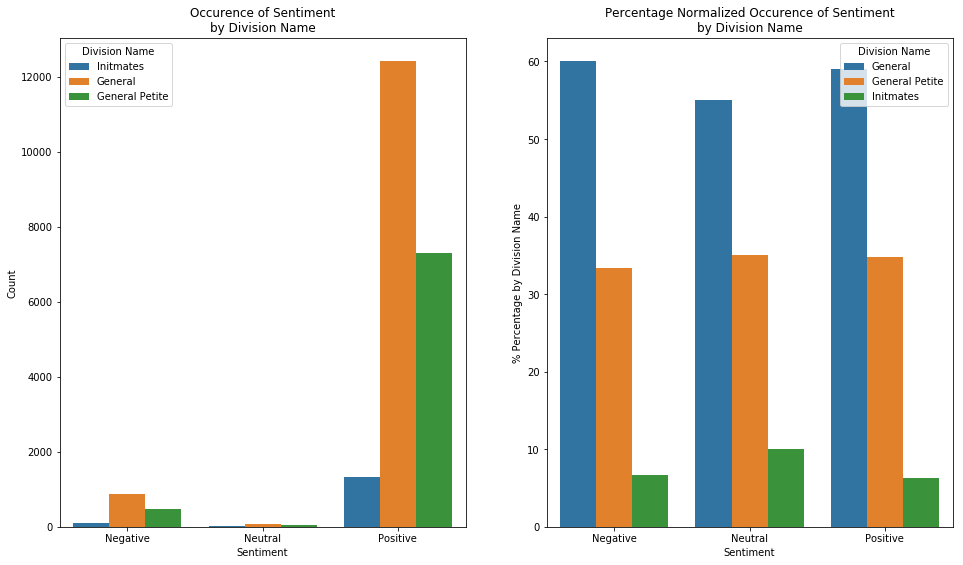

In [31]:
x, hue = "Sentiment", "Division Name"


f, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x=x, hue=hue, data=rev_new, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(x, hue))
axes[0].set_ylabel("Count")

prop_df = (rev_new[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue))

sns.barplot(x=x, y="Percentage", hue=hue, data=prop_df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(x, hue))
axes[1].set_ylabel("% Percentage by {}".format(hue))

plt.show()


In [32]:
#Save the new dataframe as 'Reviews_new.csv'
rev_new.to_csv('Reviews_new.csv')